### Simple Linear Regression

In [2]:
import numpy as np

In [3]:
# Height in cms - input data
x = np.array([[151], [174], [138], [186], [128], 
     [136], [179], [163], [152], [131]])

# Weights in kgs - output data
y = np.array([63, 81, 56, 91, 47, 
              57, 76, 72, 62, 48])

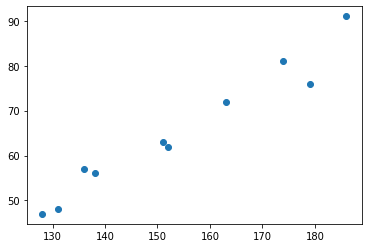

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [5]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression

In [6]:
# Create the object
regressor = LinearRegression()

In [7]:
# Train the model
regressor.fit(x, y)

LinearRegression()

In [8]:
# Value of slope - m
regressor.coef_

array([0.67461045])

In [9]:
# Value of intercept - c
regressor.intercept_

-38.45508707607701

In [12]:
# Prediction on new data
regressor.predict([[175]])

array([79.60174152])

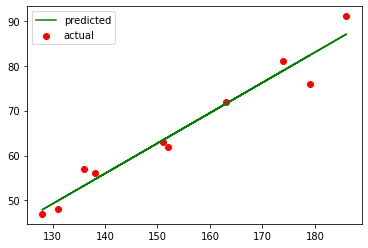

In [15]:
# Plot the data
plt.scatter(x, y, label='actual', color='red')
plt.plot(x, regressor.predict(x), label='predicted',
           color='green')
plt.legend()

#### Linear Regression on actual dataframe

In [17]:
# Dataset: Salary_data.csv
# Location: https://mitu.co.in/dataset

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('Salary_Data.csv')

In [20]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [23]:
list(df.columns)

['YearsExperience', 'Salary']

In [24]:
# Separate input and output variables
x = df['YearsExperience'].values
y = df['Salary']

In [26]:
x = x.reshape(30,1)

In [27]:
x.shape

(30, 1)

In [28]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Cross-validation

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [32]:
x_train.shape

(22, 1)

In [33]:
x_test.shape

(8, 1)

In [34]:
x_train

array([[ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

#### Build the model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()

In [39]:
# Train the model
regressor.fit(x_train, y_train)

LinearRegression()

#### Prediction on unseen / test data

In [41]:
y_pred = regressor.predict(x_test)

In [42]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

#### Compare actual and predicted by algorithm values

In [44]:
result = pd.DataFrame({
    'Experience': x_test.reshape(8),
    'Actual Salary': y_test,
    'Predicted Salary': y_pred
})

In [45]:
result

,Experience,Actual Salary,Predicted Salary
2,1.5,37731,41056.257055
28,10.3,122391,123597.709384
13,4.1,57081,65443.504334
10,3.9,63218,63567.562235
26,9.5,116969,116093.940990
24,8.7,109431,108590.172597
27,9.6,112635,117031.912039
11,4.0,55794,64505.533285


#### Mean absolute error

In [47]:
mae = np.mean(abs(y_test - y_pred))

In [48]:
mae

3508.5455930660555

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [50]:
from sklearn.metrics import mean_absolute_percentage_error

In [52]:
mean_absolute_percentage_error(y_test, y_pred) * 100

5.7545126467796965

In [53]:
import sklearn
sklearn.__version__

'1.0.2'

In [54]:
# r2 score or coefficient of determination
regressor.score(x, y)

0.955975487542377

In [56]:
regressor.predict([[12]])

array([139543.21722009])

In [57]:
regressor.predict([[15]])

array([167682.34869593])

In [58]:
regressor.predict([[20]])

array([214580.90115566])

In [59]:
# y = mx + c
20 * regressor.coef_[0] + regressor.intercept_

214580.90115565757

#### Visualize

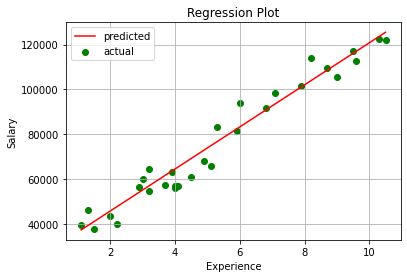

In [62]:
plt.title('Regression Plot')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x, y, color = 'green', label = 'actual')
plt.plot(x, regressor.predict(x), color='r', 
         label='predicted')
plt.legend()

In [63]:
import seaborn as sns

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

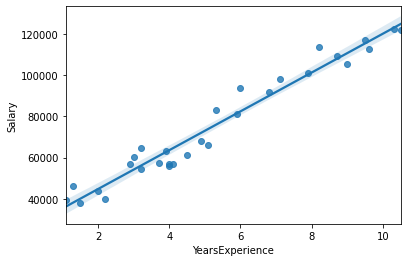

In [66]:
sns.regplot(x='YearsExperience', y='Salary', data = df)

### Multiple Regression

In [68]:
df = pd.read_csv('mtcars.csv')

In [69]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [70]:
df.corrwith(df['mpg'])

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
dtype: float64

In [71]:
# Separate the input and output data
x = df[['disp','hp','wt']]
y = df['mpg']

In [72]:
x

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320
3,258.0,110,3.215
4,360.0,175,3.440
5,225.0,105,3.460
6,360.0,245,3.570
7,146.7,62,3.190
8,140.8,95,3.150
9,167.6,123,3.440


#### Build the model

In [74]:
from sklearn.linear_model import LinearRegression

In [77]:
regressor = LinearRegression()

In [78]:
regressor.fit(x, y)

LinearRegression()

In [79]:
regressor.coef_

array([-9.37009081e-04, -3.11565508e-02, -3.80089058e+00])

In [80]:
#### Check the accuracy or r2 score
regressor.score(x, y)

0.8268361424946445

#### Predict on unseen data

In [82]:
disp = 221
hp = 102
wt = 2.91

In [83]:
regressor.predict([[disp, hp, wt]])

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.65986648])

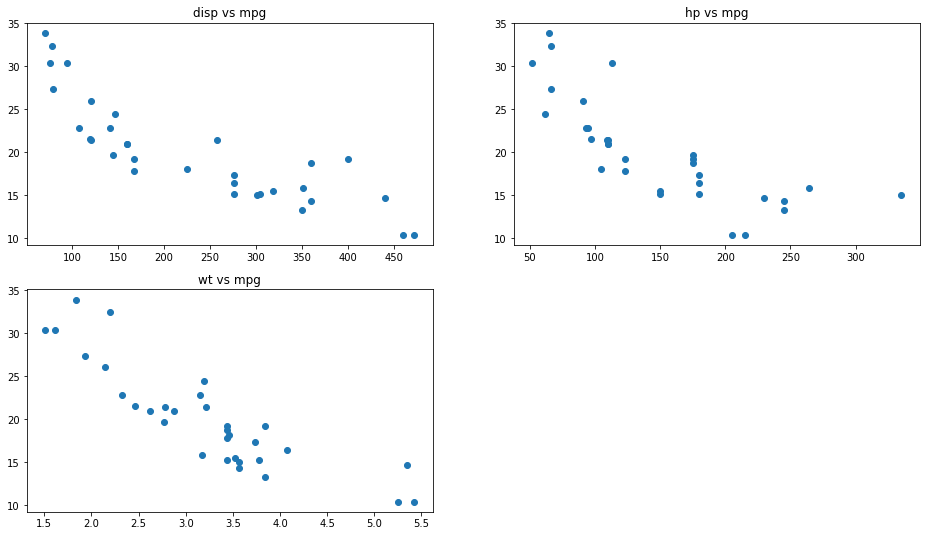

In [85]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.title('disp vs mpg')
plt.scatter(df['disp'], y)
plt.subplot(2,2,2)
plt.title('hp vs mpg')
plt.scatter(df['hp'], y)
plt.subplot(2,2,3)
plt.title('wt vs mpg')
plt.scatter(df['wt'], y)

### Polynomial Regression

In [87]:
x = np.arange(0,100,0.25)

In [89]:
# Linear equation
y = 4.5 * x + 12

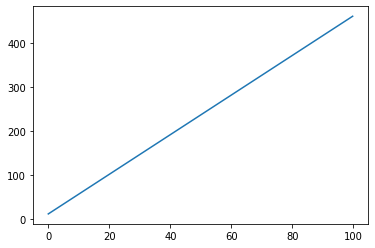

In [90]:
plt.plot(x, y)

In [93]:
# Polynomial equation
y2 = 4.5 * x**2 + 12
y3 = 4.5 * x**3 + 12
y4 = 4.5 * x**4 + 12
y5 = 4.5 * x**5 + 12

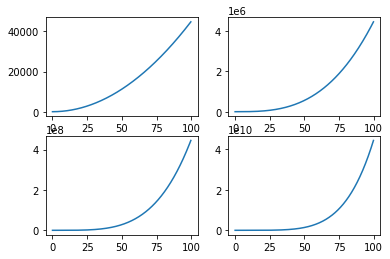

In [95]:
plt.subplot(2,2,1)
plt.plot(x, y2)
plt.subplot(2,2,2)
plt.plot(x, y3)
plt.subplot(2,2,3)
plt.plot(x, y4)
plt.subplot(2,2,4)
plt.plot(x, y5)

In [97]:
df = pd.read_csv('Salary_Data.csv')
x = df['YearsExperience'].values
x = x.reshape(30,1)
y = df['Salary']

reg = LinearRegression()
reg.fit(x, y)
print('Accuracy:', reg.score(x, y))

Accuracy: 0.9569566641435086


#### Polynomial Transformation

In [107]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)

In [108]:
x_poly;

In [109]:
reg = LinearRegression()
reg.fit(x_poly, y)
print('Accuracy:', reg.score(x_poly, y))

Accuracy: 0.9665546834956733


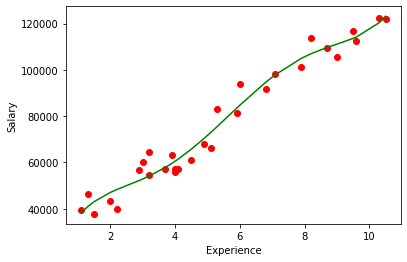

In [112]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color='r')
plt.plot(x, reg.predict(x_poly), color='g')

In [115]:
for i in range(2,21):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)
    reg.fit(x_poly, y)
    print(i,':', reg.score(x_poly, y))

2 : 0.956975168321065
3 : 0.9635969766249464
4 : 0.9636560599375091
5 : 0.9665546834956733
6 : 0.9673693577169908
7 : 0.9722578921026591
8 : 0.9728154307144676
9 : 0.9732969097554
10 : 0.9809837405195546
11 : 0.9821814100323063
12 : 0.9830191304391646
13 : 0.9830202796983353
14 : 0.9819694300988224
15 : 0.9804879711397136
16 : 0.9792398969606162
17 : 0.9800211339404278
18 : 0.965536543934586
19 : 0.9585869142433519
20 : 0.9539469696931999


### Logistic Regression

#### Sigmoid Function

In [126]:
x = np.arange(-10,10,0.25)

In [127]:
x

array([-10.  ,  -9.75,  -9.5 ,  -9.25,  -9.  ,  -8.75,  -8.5 ,  -8.25,
        -8.  ,  -7.75,  -7.5 ,  -7.25,  -7.  ,  -6.75,  -6.5 ,  -6.25,
        -6.  ,  -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,  -4.5 ,  -4.25,
        -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,  -2.5 ,  -2.25,
        -2.  ,  -1.75,  -1.5 ,  -1.25,  -1.  ,  -0.75,  -0.5 ,  -0.25,
         0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75])

In [128]:
def sigmoid(z):
    val = 1 / (1 + np.exp(-z))
    return val

In [129]:
sigmoid(x)

array([4.53978687e-05, 5.82912657e-05, 7.48462275e-05, 9.61024155e-05,
       1.23394576e-04, 1.58436219e-04, 2.03426978e-04, 2.61190319e-04,
       3.35350130e-04, 4.30557081e-04, 5.52778637e-04, 7.09670399e-04,
       9.11051194e-04, 1.16951027e-03, 1.50118226e-03, 1.92673466e-03,
       2.47262316e-03, 3.17268284e-03, 4.07013772e-03, 5.22012569e-03,
       6.69285092e-03, 8.57748541e-03, 1.09869426e-02, 1.40636270e-02,
       1.79862100e-02, 2.29773699e-02, 2.93122308e-02, 3.73268873e-02,
       4.74258732e-02, 6.00866502e-02, 7.58581800e-02, 9.53494649e-02,
       1.19202922e-01, 1.48047198e-01, 1.82425524e-01, 2.22700139e-01,
       2.68941421e-01, 3.20821301e-01, 3.77540669e-01, 4.37823499e-01,
       5.00000000e-01, 5.62176501e-01, 6.22459331e-01, 6.79178699e-01,
       7.31058579e-01, 7.77299861e-01, 8.17574476e-01, 8.51952802e-01,
       8.80797078e-01, 9.04650535e-01, 9.24141820e-01, 9.39913350e-01,
       9.52574127e-01, 9.62673113e-01, 9.70687769e-01, 9.77022630e-01,
      

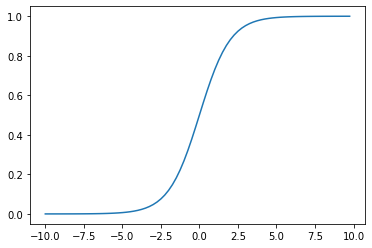

In [130]:
plt.plot(x, sigmoid(x))

In [132]:
sigmoid(-0.2)

0.45016600268752216

### Logistic Regression on Real world data

In [134]:
df = pd.read_csv('Social_Network_Ads.csv')

In [136]:
df.shape

(400, 5)

In [137]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [138]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Separate input and output variables

In [140]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [141]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


#### Visualize the data

In [143]:
import matplotlib.pyplot as plt

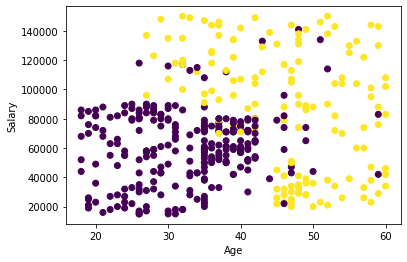

In [145]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'], x['EstimatedSalary'],c=y)

#### Normalize the data

In [167]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [168]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


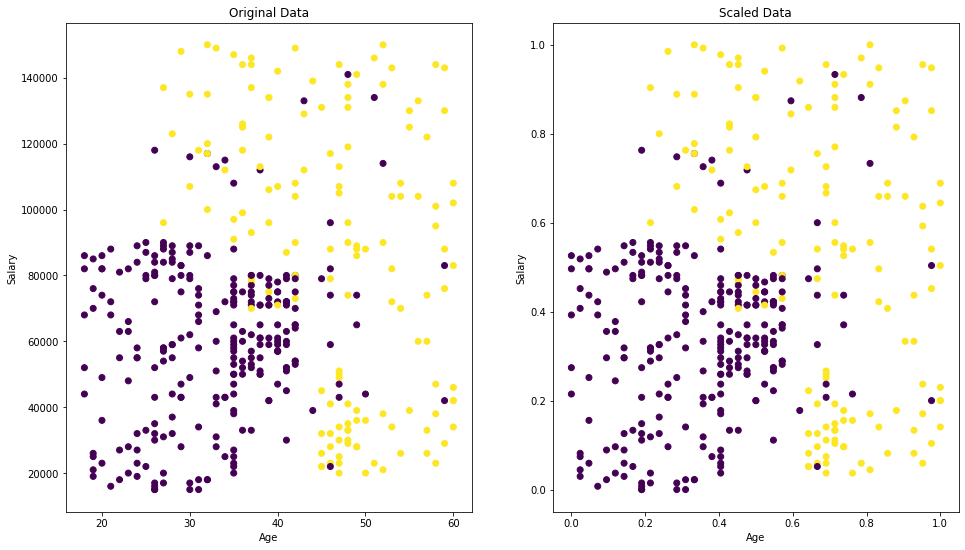

In [171]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Original Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'], x['EstimatedSalary'],c=y)

plt.subplot(1,2,2)
plt.title('Scaled Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x_scaled[:,0], x_scaled[:,1],c=y)

In [165]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [146]:
import seaborn as sns

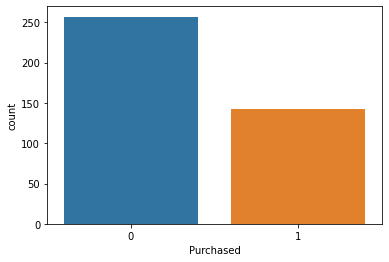

In [147]:
sns.countplot(x=y);

In [148]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

#### Cross-validation

In [150]:
from sklearn.model_selection import train_test_split

In [173]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0, test_size=0.25)

In [174]:
x_train.shape

(300, 2)

In [175]:
x_test.shape

(100, 2)

In [176]:
y_train.value_counts()

0    189
1    111
Name: Purchased, dtype: int64

In [177]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

#### Build the model

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
classifier = LogisticRegression()

In [180]:
# Train the algorithm
classifier.fit(x_train, y_train)

LogisticRegression()

#### Prediction on unseen data

In [181]:
y_pred = classifier.predict(x_test)

In [182]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [183]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [184]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [185]:
result

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [186]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

In [187]:
from sklearn.metrics import confusion_matrix

In [188]:
confusion_matrix(y_test, y_pred)

array([[67,  1],
       [10, 22]])

In [189]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89

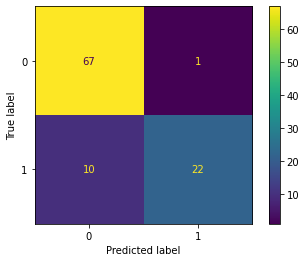

In [190]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [191]:
from sklearn.metrics import classification_report

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [193]:
new1 = [[23, 67000]]
new2 = [[56, 145000]]

In [195]:
new1 = scaler.transform(new1)
classifier.predict(new1)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])

In [196]:
new2 = scaler.transform(new2)
classifier.predict(new2)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1])

In [197]:
classifier.predict_proba(new1)

array([[0.92621384, 0.07378616]])

In [198]:
classifier.predict_proba(new2)

array([[0.0584004, 0.9415996]])